# Data Ingestion & Wrangling with Pandas

In [2]:
import requests,json
from pprint import pprint

In [3]:
#base url for all Fpl Api endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()
print(json.dumps(r, indent=3))

{
   "events": [
      {
         "id": 1,
         "name": "Gameweek 1",
         "deadline_time": "2022-08-05T17:30:00Z",
         "average_entry_score": 57,
         "finished": true,
         "data_checked": true,
         "highest_scoring_entry": 7309963,
         "deadline_time_epoch": 1659720600,
         "deadline_time_game_offset": 0,
         "highest_score": 119,
         "is_previous": false,
         "is_current": false,
         "is_next": false,
         "cup_leagues_created": false,
         "h2h_ko_matches_created": false,
         "chip_plays": [
            {
               "chip_name": "bboost",
               "num_played": 170273
            },
            {
               "chip_name": "3xc",
               "num_played": 348557
            }
         ],
         "most_selected": 28,
         "most_transferred_in": 105,
         "top_element": 366,
         "top_element_info": {
            "id": 366,
            "points": 15
         },
         "transfers_made": 0

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [6]:
# create players dataframe
players = pd.json_normalize(r['elements'])

# show some players info
players[['id', 'web_name', 'team', 'form','element_type','total_points']].head(3)
players.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [5]:
# get players stats per GW data 
r = requests.get(base_url+'event/16/live/').json()
print(json.dumps(r, indent=3))

{
   "elements": [
      {
         "id": 1,
         "stats": {
            "minutes": 1,
            "goals_scored": 0,
            "assists": 0,
            "clean_sheets": 0,
            "goals_conceded": 0,
            "own_goals": 0,
            "penalties_saved": 0,
            "penalties_missed": 0,
            "yellow_cards": 0,
            "red_cards": 0,
            "saves": 0,
            "bonus": 0,
            "bps": 3,
            "influence": "0.0",
            "creativity": "0.0",
            "threat": "0.0",
            "ict_index": "0.0",
            "starts": 0,
            "expected_goals": "0.00000",
            "expected_assists": "0.00000",
            "expected_goal_involvements": "0.00000",
            "expected_goals_conceded": "0.00000",
            "total_points": 1,
            "in_dreamteam": false
         },
         "explain": [
            {
               "fixture": 160,
               "stats": [
                  {
                     "identifier":

In [6]:
# create players gw stats dataframe
ids = pd.json_normalize(r['elements']).id.to_frame()
stats =  pd.json_normalize([x['stats'] for x in r['elements']])

players_GwStats = pd.concat([ids,stats], axis=1)

players_GwStats.head(3)
# players_GwStats.loc[result.id == 357]

id  minutes  goals_scored  assists  clean_sheets  goals_conceded  \
0   1        1             0        0             0               0   
1   2       90             0        0             0               2   
2   3       15             0        0             0               0   

   own_goals  penalties_saved  penalties_missed  yellow_cards  red_cards  \
0          0                0                 0             0          0   
1          0                0                 0             0          0   
2          0                0                 0             0          0   

   saves  bonus  bps influence creativity threat ict_index  starts  \
0      0      0    3       0.0        0.0    0.0       0.0       0   
1      8      2   29      49.8        0.0    0.0       5.0       1   
2      0      0    3       0.0        0.2    0.0       0.0       1   

  expected_goals expected_assists expected_goal_involvements  \
0        0.00000          0.00000                    0.00000   
1        0.00000          0.00112                    0.00112   
2        0.00000          0.00245                    0.00245   

  expected_goals_conceded  total_points  in_dreamteam  
0                 0.00000             1         False  
1                 2.59080             5         False  
2                 0.00000             1         False

In [7]:
players_clmns = [
    'id', 'web_name',
    'chance_of_playing_next_round','chance_of_playing_this_round','dreamteam_count','element_type',
    'ep_next','ep_this','event_points','form','in_dreamteam','points_per_game','selected_by_percent',
    'special','status','team_code','total_points','transfers_in','transfers_in_event','transfers_out',
    'transfers_out_event','value_season','minutes','goals_scored','goals_scored','assists', 'clean_sheets',
    'goals_conceded', 'own_goals','penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards','saves',
    'bonus', 'bps', 'influence', 'creativity', 'threat','ict_index', 'starts', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'expected_goals_conceded','influence_rank', 'influence_rank_type',
    'creativity_rank','creativity_rank_type', 'threat_rank', 'threat_rank_type','ict_index_rank', 'ict_index_rank_type',
    'corners_and_indirect_freekicks_order', 'direct_freekicks_order', 'penalties_order','expected_goals_per_90',
    'saves_per_90', 'expected_assists_per_90','expected_goal_involvements_per_90', 'expected_goals_conceded_per_90',
    'goals_conceded_per_90', 'now_cost_rank', 'now_cost_rank_type','form_rank', 'form_rank_type', 'points_per_game_rank',
    'points_per_game_rank_type', 'selected_rank', 'selected_rank_type','starts_per_90', 'clean_sheets_per_90'
]

In [8]:
# merge between players general info and player gw info
final = pd.merge(players[players_clmns],players_GwStats,on='id',how='inner')

In [9]:
final.head(3)

id web_name  chance_of_playing_next_round  chance_of_playing_this_round  \
0   1   Cédric                         100.0                         100.0   
1   3    Xhaka                           NaN                           NaN   
2   4   Elneny                         100.0                         100.0   

   dreamteam_count  element_type ep_next ep_this  event_points form  \
0                0             2     0.5     0.5             1  0.0   
1                1             3     0.5     0.5             1  0.0   
2                1             3     0.5     0.5             1  0.0   

   in_dreamteam_x points_per_game selected_by_percent  special status  \
0           False             1.0                 0.1    False      a   
1           False             4.4                 3.7    False      a   
2           False             1.3                 0.8    False      a   

   team_code  total_points_x  transfers_in  transfers_in_event  transfers_out  \
0          3               2          5966                 309          25885   
1          3              62        720037               45614         499796   
2          3               4        159432               17867         212913   

   transfers_out_event value_season  minutes_x  goals_scored_x  \
0                  372          0.5         28               0   
1                69052         12.2       1166               3   
2                12590          1.0         94               0   

   goals_scored_x  assists_x  clean_sheets_x  goals_conceded_x  own_goals_x  \
0               0          0               0                 0            0   
1               3          3               6                11            0   
2               0          0               0                 1            0   

   penalties_saved_x  penalties_missed_x  yellow_cards_x  red_cards_x  \
0                  0                   0               0            0   
1                  0                   0               2            0   
2                  0                   0               0            0   

   saves_x  bonus_x  bps_x influence_x creativity_x threat_x ict_index_x  \
0        0        0      5         2.4          1.6      0.0         0.4   
1        0        7    253       291.8        278.5    228.0        79.8   
2        0        0     21         4.2          5.3      0.0         1.0   

   starts_x expected_goals_x expected_assists_x expected_goal_involvements_x  \
0         0          0.00000            0.00979                      0.00979   
1        14          1.49000            1.48360                      2.97360   
2         1          0.00000            0.04431                      0.04431   

  expected_goals_conceded_x  influence_rank  influence_rank_type  \
0                   0.04350             425                  159   
1                  11.21090              54                   21   
2                   0.83280             413                  181   

   creativity_rank  creativity_rank_type  threat_rank  threat_rank_type  \
0              388                   142          477               194   
1               36                    28           63                38   
2              365                   174          482               187   

   ict_index_rank  ict_index_rank_type  corners_and_indirect_freekicks_order  \
0             431                  159                                   NaN   
1              40                   29                                   NaN   
2             412                  183                                   NaN   

   direct_freekicks_order  penalties_order  expected_goals_per_90  \
0                     NaN              NaN                0.00000   
1                     3.0              NaN                0.11501   
2                     NaN              NaN                0.00000   

   saves_per_90  expected_assists_per_90  expected_goal_involvements_per_90  \
0           0.0                  0.




# Data Processing & Cleaning
- Data exploring
- Data cleaning

### Data Exploring

In [10]:
final

id     web_name  chance_of_playing_next_round  \
0      1       Cédric                         100.0   
1      3        Xhaka                           NaN   
2      4       Elneny                         100.0   
3      5      Holding                           NaN   
4      6       Partey                         100.0   
..   ...          ...                           ...   
662  625  Diego Costa                         100.0   
663  629       Traoré                          75.0   
664  657       Fraser                           NaN   
665  658    Griffiths                           NaN   
666  664    Lembikisa                           NaN   

     chance_of_playing_this_round  dreamteam_count  element_type ep_next  \
0                           100.0                0             2     0.5   
1                             NaN                1             3     0.5   
2                           100.0                1             3     0.5   
3                             NaN                0             2     0.5   
4                           100.0                0             3     0.5   
..                            ...              ...           ...     ...   
662                           0.0                0             4     0.0   
663                         100.0                0             3     0.0   
664                           NaN                0             4     0.0   
665                           NaN                0             3     0.0   
666                           NaN                0             2     1.3   

    ep_this  event_points form  in_dreamteam_x points_per_game  \
0       0.5             1  0.0           False             1.0   
1       0.5             1  0.0           False             4.4   
2       0.5             1  0.0           False             1.3   
3       0.5             0  0.0           False             1.0   
4       0.5             2  0.0           False             3.8   
..      ...           ...  ...             ...             ...   
662     0.0             0  0.0           False             1.2   
663    -0.5             1  0.0           False             1.5   
664    -0.5             0  0.0           False             0.0   
665    -0.5             0  0.0           False             0.0   
666     0.8             1  0.0           False             1.0   

    selected_by_percent  special status  team_code  total_points_x  \
0                   0.1    False      a          3               2   
1                   3.7    False      a          3              62   
2                   0.8    False      a          3               4   
3                   0.1    False      a          3               4   
4                   0.5    False      a          3              42   
..                  ...      ...    ...        ...             ...   
662                 0.3    False      a         39               7   
663                 0.1    False      d         39              12   
664                 0.0    False      a         39               0   
665                 0.0    False      a         39               0   
666                 0.0    False      a         39               1   

     transfers_in  transfers_in_event  transfers_out  transfers_out_event  \
0            5966                 309          25885                  372   
1          720037               45614         499796                69052   
2          159432               17867         212913                12590   
3            5931                 335          16164                  432   
4           82301                6256         100148                 6379   
..            ...                 ...            ...                  ...   
662        131307                6468         110111                 5944   
663         14345                1281           9086                 1607   
664          4176                2163           1320                 1035   
665           470           

In [11]:
# Displaying info about none values
final[['chance_of_playing_next_round', 'chance_of_playing_this_round',
       'corners_and_indirect_freekicks_order', 'direct_freekicks_order',
       'penalties_order']].isna().sum()

chance_of_playing_next_round            247
chance_of_playing_this_round            265
corners_and_indirect_freekicks_order    589
direct_freekicks_order                  608
penalties_order                         608
dtype: int64

In [12]:
# Display rows conatains none values
final[final.chance_of_playing_next_round.isna()]

id   web_name  chance_of_playing_next_round  \
1      3      Xhaka                           NaN   
3      5    Holding                           NaN   
8     10      White                           NaN   
9     11    Nketiah                           NaN   
14    16    Gabriel                           NaN   
..   ...        ...                           ...   
658  568   Campbell                           NaN   
659  579     Guedes                           NaN   
664  657     Fraser                           NaN   
665  658  Griffiths                           NaN   
666  664  Lembikisa                           NaN   

     chance_of_playing_this_round  dreamteam_count  element_type ep_next  \
1                             NaN                1             3     0.5   
3                             NaN                0             2     0.5   
8                             NaN                0             2     0.5   
9                             NaN                0             4     0.5   
14                            NaN                1             2     0.5   
..                            ...              ...           ...     ...   
658                           NaN                0             3     0.0   
659                           NaN                0             3     0.0   
664                           NaN                0             4     0.0   
665                           NaN                0             3     0.0   
666                           NaN                0             2     1.3   

    ep_this  event_points form  in_dreamteam_x points_per_game  \
1       0.5             1  0.0           False             4.4   
3       0.5             0  0.0           False             1.0   
8       0.5             8  0.0           False             4.7   
9       0.5             0  0.0           False             1.0   
14      0.5             5  0.0            True             5.1   
..      ...           ...  ...             ...             ...   
658    -0.5             0  0.0           False             1.0   
659    -0.5             2  0.0           False             2.3   
664    -0.5             0  0.0           False             0.0   
665    -0.5             0  0.0           False             0.0   
666     0.8             1  0.0           False             1.0   

    selected_by_percent  special status  team_code  total_points_x  \
1                   3.7    False      a          3              62   
3                   0.1    False      a          3               4   
8                  11.5    False      a          3              66   
9                   0.9    False      a          3              12   
14                 14.1    False      a          3              72   
..                  ...      ...    ...        ...             ...   
658                 0.4    False      a         39               5   
659                 0.2    False      a         39              28   
664                 0.0    False      a         39               0   
665                 0.0    False      a         39               0   
666                 0.0    False      a         39               1   

     transfers_in  transfers_in_event  transfers_out  transfers_out_event  \
1          720037               45614         499796                69052   
3            5931                 335          16164                  432   
8         1250892              367283         672797               149608   
9          101006               81168         101416                25013   
14        1485808              309837         965675               130787   
..            ...                 ...            ...                  ...   
658         63295                 171          55365                 1706   
659        110116                2012         104416                 2042   
664          4176                2163           1320                 1035   
665           470                 331            187

In [13]:
# General look at our data 
final.describe()

id  chance_of_playing_next_round  chance_of_playing_this_round  \
count  667.000000                    420.000000                    402.000000   
mean   334.000000                     60.654762                     56.716418   
std    192.690598                     45.546141                     48.592808   
min      1.000000                      0.000000                      0.000000   
25%    167.500000                      0.000000                      0.000000   
50%    334.000000                    100.000000                    100.000000   
75%    500.500000                    100.000000                    100.000000   
max    667.000000                    100.000000                    100.000000   

       dreamteam_count  element_type  event_points   team_code  \
count       667.000000    667.000000    667.000000  667.000000   
mean          0.263868      2.554723      1.230885   25.586207   
std           0.609681      0.829950      2.407584   26.529710   
min           0.000000      1.000000     -1.000000    1.000000   
25%           0.000000      2.000000      0.000000    7.000000   
50%           0.000000      3.000000      0.000000   14.000000   
75%           0.000000      3.000000      1.000000   36.000000   
max           5.000000      4.000000     16.000000   94.000000   

       total_points_x  transfers_in  transfers_in_event  transfers_out  \
count      667.000000  6.670000e+02          667.000000   6.670000e+02   
mean        18.311844  3.030345e+05        26301.283358   3.030345e+05   
std         21.624253  7.789290e+05        77648.006758   6.971476e+05   
min         -1.000000  0.000000e+00            0.000000   1.000000e+01   
25%          0.000000  3.713000e+03          136.000000   8.445000e+03   
50%          9.000000  2.706800e+04          938.000000   4.315800e+04   
75%         31.000000  1.783150e+05         9550.500000   2.201265e+05   
max        123.000000  5.858007e+06       770398.000000   5.372948e+06   

       transfers_out_event    minutes_x  goals_scored_x  goals_scored_x  \
count         6.670000e+02   667.000000      667.000000      667.000000   
mean          2.630128e+04   431.400300        0.598201        0.598201   
std           7.398423e+04   469.843217        1.560741        1.560741   
min           0.000000e+00     0.000000        0.000000        0.000000   
25%           2.445000e+02     0.000000        0.000000        0.000000   
50%           1.905000e+03   221.000000        0.000000        0.000000   
75%           1.622850e+04   847.000000        0.000000        0.000000   
max           1.134708e+06  1350.000000       18.000000       18.000000   

        assists_x  clean_sheets_x  goals_conceded_x  own_goals_x  \
count  667.000000      667.000000        667.000000   667.000000   
mean     0.535232        1.356822          6.910045     0.029985   
std      1.110908        1.855548          7.880356     0.170674   
min      0.000000        0.000000          0.000000     0.000000   
25%      0.000000        0.000000          0.000000     0.000000   
50%      0.000000        0.000000          3.000000     0.000000   
75%      1.000000        3.000000         13.000000     0.000000   
max     10.000000        9.000000         32.000000     1.000000   

       penalties_saved_x  penalties_missed_x  yellow_cards_x  red_cards_x  \
count         667.000000          667.000000      667.000000   667.000000   
mean            0.010495            0.013493        0.775112     0.017991   
std             0.128087            0.127805        1.258167     0.133018   
min             0.000000            0.000000        0.000000     0.000000   
25%             0.000000            0.000000        0.000000     0.000000   
50%             0.000000            0.000000        0.000000     0.000000   
75%             0.000000            0.000000        1.000000     0.000000   
max             2.000000            2.000000        6.000000     1.000000   

          saves_x     bonus_x       bps_

In [14]:
final.dtypes

id                                int64
web_name                         object
chance_of_playing_next_round    float64
chance_of_playing_this_round    float64
dreamteam_count                   int64
                                 ...   
expected_assists_y               object
expected_goal_involvements_y     object
expected_goals_conceded_y        object
total_points_y                    int64
in_dreamteam_y                     bool
Length: 96, dtype: object

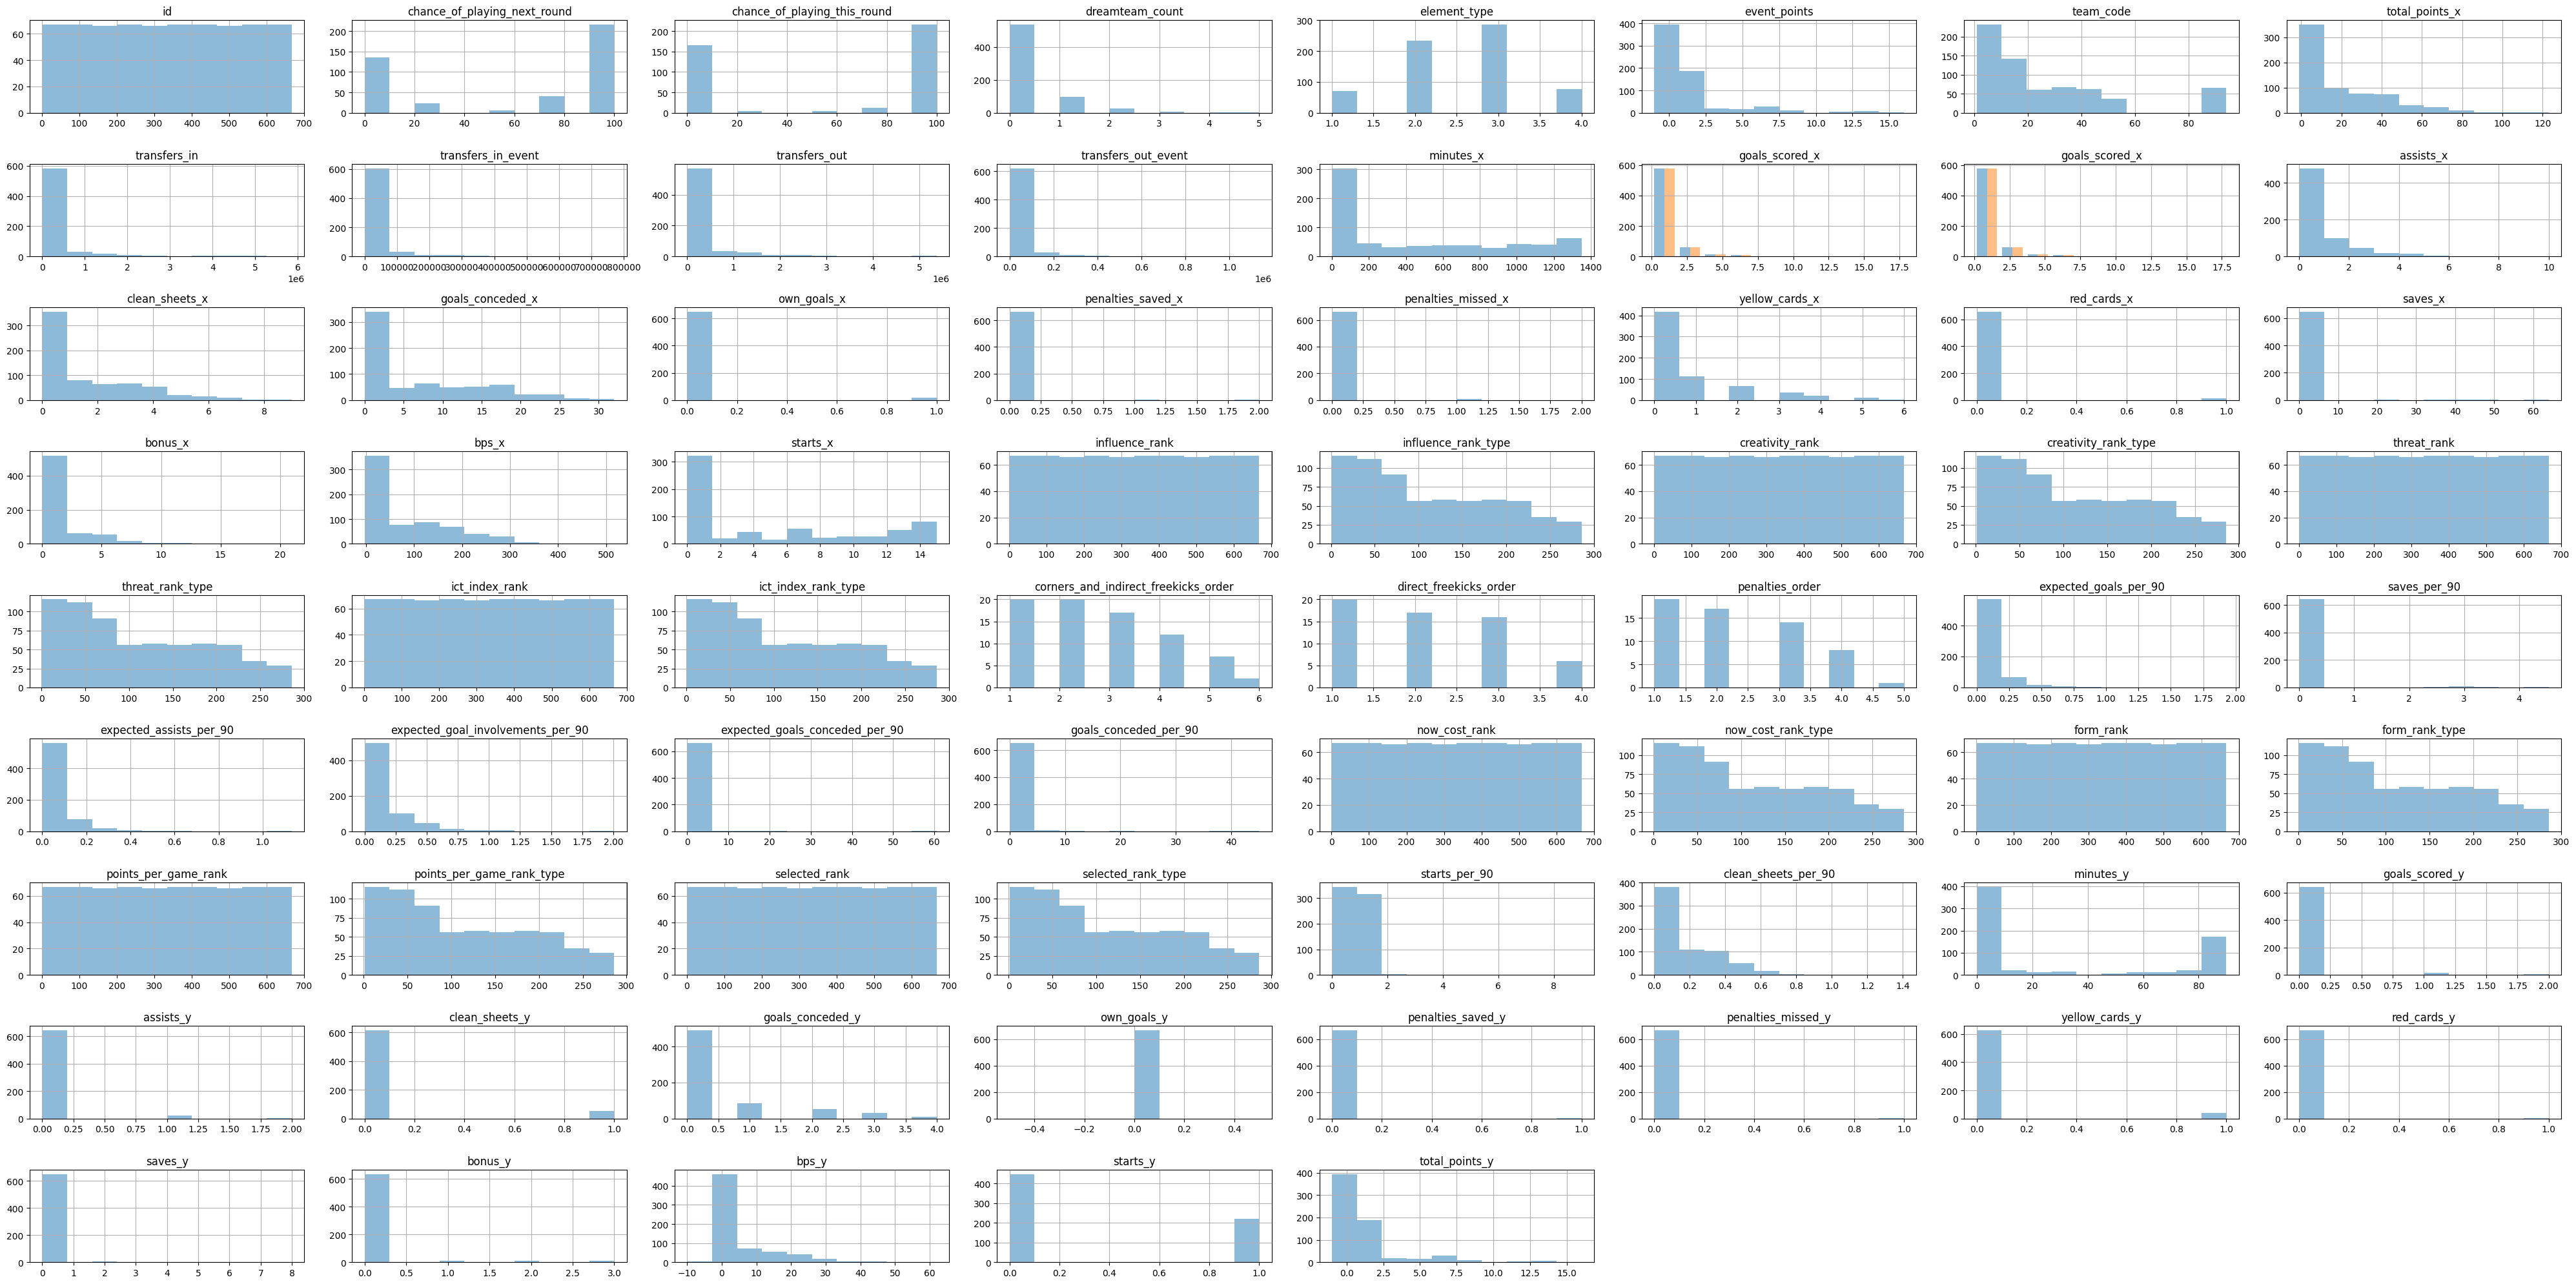

In [15]:
# Ploting some graphs
import matplotlib.pyplot as plt

final.hist(alpha=0.5, figsize=(40, 20))
plt.tight_layout()
plt.show()

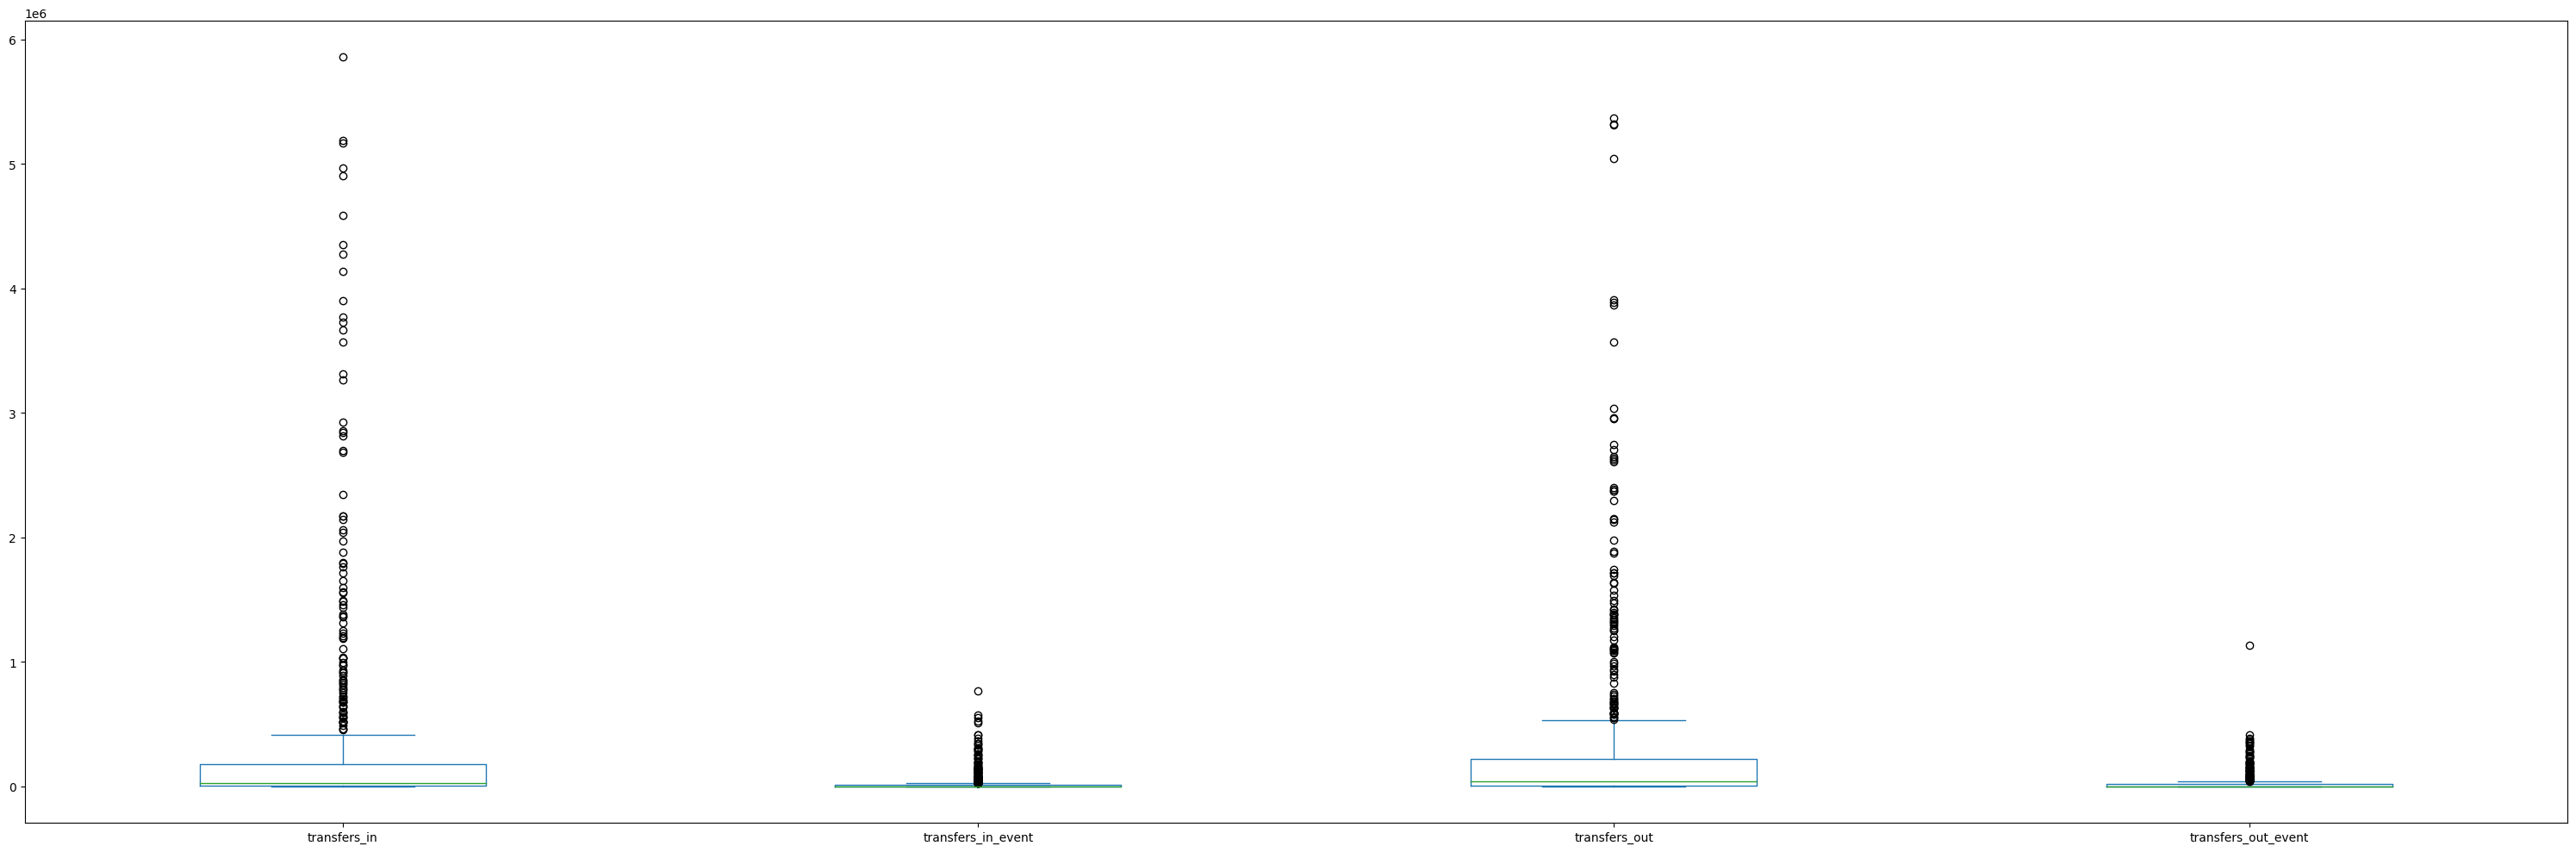

In [16]:
final[['transfers_in','transfers_in_event','transfers_out','transfers_out_event']].plot.box(figsize=(30, 10))
plt.tight_layout()
plt.show()

In [17]:
final.chance_of_playing_next_round.value_counts()

100.0    216
0.0      135
75.0      40
25.0      23
50.0       6
Name: chance_of_playing_next_round, dtype: int64

In [18]:
final.special.value_counts()

False    667
Name: special, dtype: int64

### Data Cleaning

In [19]:
final

id     web_name  chance_of_playing_next_round  \
0      1       Cédric                         100.0   
1      3        Xhaka                           NaN   
2      4       Elneny                         100.0   
3      5      Holding                           NaN   
4      6       Partey                         100.0   
..   ...          ...                           ...   
662  625  Diego Costa                         100.0   
663  629       Traoré                          75.0   
664  657       Fraser                           NaN   
665  658    Griffiths                           NaN   
666  664    Lembikisa                           NaN   

     chance_of_playing_this_round  dreamteam_count  element_type ep_next  \
0                           100.0                0             2     0.5   
1                             NaN                1             3     0.5   
2                           100.0                1             3     0.5   
3                             NaN                0             2     0.5   
4                           100.0                0             3     0.5   
..                            ...              ...           ...     ...   
662                           0.0                0             4     0.0   
663                         100.0                0             3     0.0   
664                           NaN                0             4     0.0   
665                           NaN                0             3     0.0   
666                           NaN                0             2     1.3   

    ep_this  event_points form  in_dreamteam_x points_per_game  \
0       0.5             1  0.0           False             1.0   
1       0.5             1  0.0           False             4.4   
2       0.5             1  0.0           False             1.3   
3       0.5             0  0.0           False             1.0   
4       0.5             2  0.0           False             3.8   
..      ...           ...  ...             ...             ...   
662     0.0             0  0.0           False             1.2   
663    -0.5             1  0.0           False             1.5   
664    -0.5             0  0.0           False             0.0   
665    -0.5             0  0.0           False             0.0   
666     0.8             1  0.0           False             1.0   

    selected_by_percent  special status  team_code  total_points_x  \
0                   0.1    False      a          3               2   
1                   3.7    False      a          3              62   
2                   0.8    False      a          3               4   
3                   0.1    False      a          3               4   
4                   0.5    False      a          3              42   
..                  ...      ...    ...        ...             ...   
662                 0.3    False      a         39               7   
663                 0.1    False      d         39              12   
664                 0.0    False      a         39               0   
665                 0.0    False      a         39               0   
666                 0.0    False      a         39               1   

     transfers_in  transfers_in_event  transfers_out  transfers_out_event  \
0            5966                 309          25885                  372   
1          720037               45614         499796                69052   
2          159432               17867         212913                12590   
3            5931                 335          16164                  432   
4           82301                6256         100148                 6379   
..            ...                 ...            ...                  ...   
662        131307                6468         110111                 5944   
663         14345                1281           9086                 1607   
664          4176                2163           1320                 1035   
665           470           

In [20]:
# Find the features that contains null values
final.columns[final.isna().sum()>0]

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round',
       'corners_and_indirect_freekicks_order', 'direct_freekicks_order',
       'penalties_order'],
      dtype='object')

In [21]:
# Drop duplicated Rows
final.drop_duplicates()
final = final.loc[:,~final.columns.duplicated()].copy()

In [22]:
final[['chance_of_playing_next_round', 'chance_of_playing_this_round',
       'corners_and_indirect_freekicks_order', 'direct_freekicks_order',
       'penalties_order']].isna().sum()

chance_of_playing_next_round            247
chance_of_playing_this_round            265
corners_and_indirect_freekicks_order    589
direct_freekicks_order                  608
penalties_order                         608
dtype: int64

In [23]:
final.chance_of_playing_next_round.value_counts()

100.0    216
0.0      135
75.0      40
25.0      23
50.0       6
Name: chance_of_playing_next_round, dtype: int64

In [24]:
final.corners_and_indirect_freekicks_order.value_counts()

2.0    20
1.0    20
3.0    17
4.0    12
5.0     7
6.0     2
Name: corners_and_indirect_freekicks_order, dtype: int64

In [25]:
# Filling null values with specific values
final.loc[:,'chance_of_playing_next_round'].fillna(100.0,inplace=True)
final.loc[:,'chance_of_playing_this_round'].fillna(100.0,inplace=True)
final.loc[:,'corners_and_indirect_freekicks_order'].fillna(10.0,inplace=True)
final.loc[:,'direct_freekicks_order'].fillna(10.0,inplace=True)
final.loc[:,'penalties_order'].fillna(10.0,inplace=True)

In [26]:
final.columns[final.isna().sum()>0]

Index([], dtype='object')

In [27]:
final.dtypes

id                                int64
web_name                         object
chance_of_playing_next_round    float64
chance_of_playing_this_round    float64
dreamteam_count                   int64
                                 ...   
expected_assists_y               object
expected_goal_involvements_y     object
expected_goals_conceded_y        object
total_points_y                    int64
in_dreamteam_y                     bool
Length: 95, dtype: object

In [28]:
final.dtypes

id                                int64
web_name                         object
chance_of_playing_next_round    float64
chance_of_playing_this_round    float64
dreamteam_count                   int64
                                 ...   
expected_assists_y               object
expected_goal_involvements_y     object
expected_goals_conceded_y        object
total_points_y                    int64
in_dreamteam_y                     bool
Length: 95, dtype: object

In [29]:
temp1 = final[['id','dreamteam_count', 'element_type','event_points','in_dreamteam_x','special','team_code', 
       'total_points_x', 'transfers_in', 'transfers_in_event',
       'transfers_out', 'transfers_out_event','minutes_x','goals_scored_x', 'assists_x', 'clean_sheets_x',
       'goals_conceded_x', 'own_goals_x', 'penalties_saved_x',
       'penalties_missed_x', 'yellow_cards_x', 'red_cards_x', 'saves_x',
       'bonus_x', 'bps_x', 'starts_x','influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank', 'threat_rank_type',
       'ict_index_rank', 'ict_index_rank_type',
       'corners_and_indirect_freekicks_order', 'direct_freekicks_order',
       'penalties_order','now_cost_rank', 'now_cost_rank_type', 'form_rank', 'form_rank_type',
       'points_per_game_rank', 'points_per_game_rank_type', 'selected_rank',
       'selected_rank_type', 'minutes_y', 'goals_scored_y', 'assists_y', 'clean_sheets_y',
       'goals_conceded_y', 'own_goals_y', 'penalties_saved_y',
       'penalties_missed_y', 'yellow_cards_y', 'red_cards_y', 'saves_y',
       'bonus_y', 'bps_y', 'starts_y','total_points_y', 'in_dreamteam_y']].astype('int32')
temp2 = final[['chance_of_playing_next_round','chance_of_playing_this_round','clean_sheets_per_90',
               'creativity_x','creativity_y', 'ep_next', 'ep_this', 'expected_assists_per_90', 'expected_assists_x',
               'expected_assists_y','expected_goal_involvements_per_90','expected_goal_involvements_x',
               'expected_goal_involvements_y','expected_goals_conceded_per_90','expected_goals_conceded_x',
               'expected_goals_conceded_y','expected_goals_per_90','expected_goals_x','expected_goals_y',
               'form','goals_conceded_per_90','ict_index_x','ict_index_y','influence_x','influence_y',
               'points_per_game','saves_per_90','selected_by_percent','starts_per_90','threat_x','threat_y','value_season'
              ]].astype('float32')
temp3 = final[['web_name','status']].astype('str')

In [30]:
final = pd.concat([temp1,temp2,temp3],axis=1)
test = pd.concat([temp1,temp2,temp3],axis=1)
test.dtypes.value_counts()

int32      61
float32    32
object      2
dtype: int64

In [31]:
test = test.loc[:,~test.columns.duplicated()].copy()
test.goals_scored_x

0      0
1      3
2      0
3      0
4      2
      ..
662    0
663    0
664    0
665    0
666    0
Name: goals_scored_x, Length: 667, dtype: int32

In [50]:
# Droping useless features
final.drop(['id','web_name'], axis = 1,inplace=True)

# Converting Categorical Data Columns to Numerical
final.status.value_counts()

In [33]:
# using .get_dummies function to convert
# the categorical datatype to numerical
# and storing the returned dataFrame
# in a new variable df1
df1 = pd.get_dummies(final['status'])

# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
final = pd.concat([final, df1], axis=1).reindex(final.index)

# removing the column 'Purchased' from df
# as it is of no use now.
final.drop('status', axis=1, inplace=True)

# printing df
final

id  dreamteam_count  element_type  event_points  in_dreamteam_x  \
0      1                0             2             1               0   
1      3                1             3             1               0   
2      4                1             3             1               0   
3      5                0             2             0               0   
4      6                0             3             2               0   
..   ...              ...           ...           ...             ...   
662  625                0             4             0               0   
663  629                0             3             1               0   
664  657                0             4             0               0   
665  658                0             3             0               0   
666  664                0             2             1               0   

     special  team_code  total_points_x  transfers_in  transfers_in_event  \
0          0          3               2          5966                 309   
1          0          3              62        720037               45614   
2          0          3               4        159432               17867   
3          0          3               4          5931                 335   
4          0          3              42         82301                6256   
..       ...        ...             ...           ...                 ...   
662        0         39               7        131307                6468   
663        0         39              12         14345                1281   
664        0         39               0          4176                2163   
665        0         39               0           470                 331   
666        0         39               1           769                 769   

     transfers_out  transfers_out_event  minutes_x  goals_scored_x  assists_x  \
0            25885                  372         28               0          0   
1           499796                69052       1166               3          3   
2           212913                12590         94               0          0   
3            16164                  432         12               0          0   
4           100148                 6379        959               2          0   
..             ...                  ...        ...             ...        ...   
662         110111                 5944        412               0          0   
663           9086                 1607        380               0          1   
664           1320                 1035          0               0          0   
665            187                  165          0               0          0   
666            258                  258         22               0          0   

     clean_sheets_x  goals_conceded_x  own_goals_x  penalties_saved_x  \
0                 0                 0            0                  0   
1                 6                11            0                  0   
2                 0                 1            0                  0   
3                 0                 0            0                  0   
4                 7                 6            0                  0   
..              ...               ...          ...                ...   
662               1                 9            0                  0   
663               0                 7            0                  0   
664               0                 0            0                  0   
665               0                 0            0                  0   
666               0                 1            0                  0   

     penalties_missed_x  yellow_cards_x  red_cards_x  saves_x  bonus_x  bps_x  \
0                     0               0            0        0        0      5   
1                     0               2            0        0        7    253   
2                     0               0            0        0        0     21   
3                     0       

In [34]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(final, title="Pandas Profiling Report")
# # profile.to_file("your_report.html")

In [35]:
# import sweetviz
# my_report = sweetviz.analyze(final,target_feat='total_points_y')
### create a whole report in form of HTML file
# my_report.show_html('Report.html')

# Dealing with Features & Dimensionality

### Droping highly correlated features
- First we compare between the usual correlation filtering function
- Enhance the Function & use it

C:\Users\VENUS\AppData\Local\Temp\ipykernel_10920\1889050098.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = x.corr()


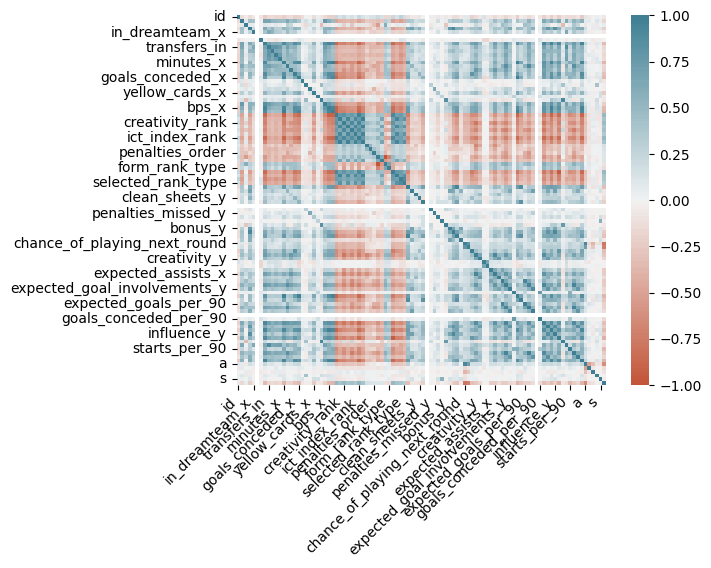

In [36]:
import seaborn as sns

# checking correlation using heatmap
x = final.loc[:, final.columns != 'total_points_y']

corr = x.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [37]:
cor_matrix = x.corr().abs()
print(cor_matrix)

                       id  dreamteam_count  element_type  event_points  \
id               1.000000         0.141894      0.036541      0.119267   
dreamteam_count  0.141894         1.000000      0.072311      0.434091   
element_type     0.036541         0.072311      1.000000      0.073320   
event_points     0.119267         0.434091      0.073320      1.000000   
in_dreamteam_x   0.061750         0.407667      0.041137      0.227341   
...                   ...              ...           ...           ...   
d                0.056198         0.071054      0.004299      0.018558   
i                0.014910         0.004765      0.049289      0.054272   
n                0.029194         0.111274      0.069745      0.051726   
s                0.012916         0.044441      0.009073      0.095995   
u                0.065617         0.170354      0.047307      0.217389   

                 in_dreamteam_x  special  team_code  total_points_x  \
id                     0.061750      NaN

C:\Users\VENUS\AppData\Local\Temp\ipykernel_10920\172537408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = x.corr().abs()


In [38]:
import numpy as np
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                 id  dreamteam_count  element_type  event_points  \
id              NaN         0.141894      0.036541      0.119267   
dreamteam_count NaN              NaN      0.072311      0.434091   
element_type    NaN              NaN           NaN      0.073320   
event_points    NaN              NaN           NaN           NaN   
in_dreamteam_x  NaN              NaN           NaN           NaN   
...              ..              ...           ...           ...   
d               NaN              NaN           NaN           NaN   
i               NaN              NaN           NaN           NaN   
n               NaN              NaN           NaN           NaN   
s               NaN              NaN           NaN           NaN   
u               NaN              NaN           NaN           NaN   

                 in_dreamteam_x  special  team_code  total_points_x  \
id                     0.061750      NaN   0.080584        0.233647   
dreamteam_count        0.407667      NaN 

C:\Users\VENUS\AppData\Local\Temp\ipykernel_10920\2970884815.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [39]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)


['goals_conceded_x', 'bps_x', 'starts_x', 'influence_rank', 'creativity_rank_type', 'threat_rank', 'threat_rank_type', 'ict_index_rank', 'ict_index_rank_type', 'form_rank', 'points_per_game_rank', 'points_per_game_rank_type', 'bps_y', 'starts_y', 'expected_assists_x', 'expected_goals_conceded_x', 'expected_goals_per_90', 'expected_goals_x', 'ict_index_x', 'influence_x', 'influence_y', 'points_per_game', 'saves_per_90', 'threat_x', 'value_season', 'a']


* Read more in : https://towardsdatascience.com/are-you-dropping-too-many-correlated-features-d1c96654abe6

In [40]:

def calcDrop(res):
    # All variables with correlation > cutoff
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # All unique variables in drop column
    poss_drop = list(set(res['drop'].tolist()))

    # Keep any variable not in drop column
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    # Drop any variables in same row as a keep variable
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    # Remove drop variables from possible drop 
    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    # subset res dataframe to include possible drop pairs
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    # remove rows that are decided (drop), take set and add to drops
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop

def corrX_new(df, cut = 0.9) :
       
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
    
    dropcols = list()
    
    res = pd.DataFrame(columns=(['v1', 'v2', 'v1.target', 
                                 'v2.target','corr', 'drop' ]))
    
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([ corr_mtx.index[row],
                up.columns[col],
                avg_corr[row],
                avg_corr[col],
                up.iloc[row,col],
                drop],
                index = res.columns)
        
                res = res.append(s, ignore_index = True)
    
    dropcols_names = calcDrop(res)
    
    return(dropcols_names)

In [41]:
drop_new = corrX_new(x, cut = 0.9)
len(drop_new)

C:\Users\VENUS\AppData\Local\Temp\ipykernel_10920\2035525443.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = df.corr().abs()
C:\Users\VENUS\AppData\Local\Temp\ipykernel_10920\2035525443.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
C:\Users\VENUS\AppData\Local\Temp\ipykernel_10920\2035525443.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

22

In [42]:
# The list of the importent features (not to drop)
drop_new

['influence_rank',
 'minutes_x',
 'ict_index_rank_type',
 'creativity_x',
 'ict_index_rank',
 'chance_of_playing_next_round',
 'creativity_rank',
 'expected_goals_conceded_x',
 'influence_rank_type',
 'points_per_game',
 'expected_goal_involvements_per_90',
 'threat_x',
 'saves_x',
 'starts_x',
 'creativity_rank_type',
 'minutes_y',
 'expected_goal_involvements_x',
 'bps_y',
 'now_cost_rank',
 'influence_x',
 'total_points_x',
 'bps_x']

In [43]:
# This features should not have been dropped
list(set(to_drop).difference(set(drop_new)))

['saves_per_90',
 'goals_conceded_x',
 'ict_index_x',
 'influence_y',
 'form_rank',
 'threat_rank',
 'points_per_game_rank_type',
 'threat_rank_type',
 'expected_goals_x',
 'starts_y',
 'a',
 'expected_assists_x',
 'expected_goals_per_90',
 'points_per_game_rank',
 'value_season']

In [44]:
final.drop(drop_new, axis = 1,inplace=True)

In [52]:
final

dreamteam_count  element_type  event_points  in_dreamteam_x  special  \
0                  0             2             1               0        0   
1                  1             3             1               0        0   
2                  1             3             1               0        0   
3                  0             2             0               0        0   
4                  0             3             2               0        0   
..               ...           ...           ...             ...      ...   
662                0             4             0               0        0   
663                0             3             1               0        0   
664                0             4             0               0        0   
665                0             3             0               0        0   
666                0             2             1               0        0   

     team_code  transfers_in  transfers_in_event  transfers_out  \
0            3          5966                 309          25885   
1            3        720037               45614         499796   
2            3        159432               17867         212913   
3            3          5931                 335          16164   
4            3         82301                6256         100148   
..         ...           ...                 ...            ...   
662         39        131307                6468         110111   
663         39         14345                1281           9086   
664         39          4176                2163           1320   
665         39           470                 331            187   
666         39           769                 769            258   

     transfers_out_event  goals_scored_x  assists_x  clean_sheets_x  \
0                    372               0          0               0   
1                  69052               3          3               6   
2                  12590               0          0               0   
3                    432               0          0               0   
4                   6379               2          0               7   
..                   ...             ...        ...             ...   
662                 5944               0          0               1   
663                 1607               0          1               0   
664                 1035               0          0               0   
665                  165               0          0               0   
666                  258               0          0               0   

     goals_conceded_x  own_goals_x  penalties_saved_x  penalties_missed_x  \
0                   0            0                  0                   0   
1                  11            0                  0                   0   
2                   1            0                  0                   0   
3                   0            0                  0                   0   
4                   6            0                  0                   0   
..                ...          ...                ...                 ...   
662                 9            0                  0                   0   
663                 7            0                  0                   0   
664                 0            0                  0                   0   
665                 0            0                  0                   0   
666                 1            0                  0                   0   

     yellow_cards_x  red_cards_x  bonus_x  threat_rank  threat_rank_type  \
0                 0            0        0          477               194   
1                 2            0        7           63                38   
2                 0            0        0          482               187   
3                 0            0        0          483               198   
4                 1            0        4          150                95   
..              ...          ...      ...

### Applying  Apply PCA in Python for Dimensionality Reduction

In [70]:
# Import necessary libraries
import pandas as pd # to load the dataframe
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps

In [77]:
X = final.drop(['total_points_y'], axis = 1)
# Standardize the features
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(X))
scaled_data

0         1         2         3    4         5         6   \
0   -0.433122 -0.668882 -0.095971 -0.129492  0.0 -0.851994 -0.381667   
1    1.208312  0.536913 -0.095971 -0.129492  0.0 -0.851994  0.535755   
2    1.208312  0.536913 -0.095971 -0.129492  0.0 -0.851994 -0.184497   
3   -0.433122 -0.668882 -0.511637 -0.129492  0.0 -0.851994 -0.381712   
4   -0.433122  0.536913  0.319695 -0.129492  0.0 -0.851994 -0.283593   
..        ...       ...       ...       ...  ...       ...       ...   
662 -0.433122  1.742709 -0.511637 -0.129492  0.0  0.505993 -0.220632   
663 -0.433122  0.536913 -0.095971 -0.129492  0.0  0.505993 -0.370902   
664 -0.433122  1.742709 -0.511637 -0.129492  0.0  0.505993 -0.383967   
665 -0.433122  0.536913 -0.511637 -0.129492  0.0  0.505993 -0.388728   
666 -0.433122 -0.668882 -0.095971 -0.129492  0.0  0.505993 -0.388344   

           7         8         9         10        11        12        13  \
0   -0.334996 -0.397846 -0.350733 -0.383568 -0.482159 -0.731773 -0.877528   
1    0.248908  0.282450  0.578269  1.540039  2.220361  2.504200  0.519396   
2   -0.108704 -0.129369 -0.185466 -0.383568 -0.482159 -0.731773 -0.750535   
3   -0.334661 -0.411801 -0.349922 -0.383568 -0.482159 -0.731773 -0.877528   
4   -0.258350 -0.291242 -0.269480  0.898837 -0.482159  3.043529 -0.115569   
..        ...       ...       ...       ...       ...       ...       ...   
662 -0.255617 -0.276940 -0.275364 -0.383568 -0.482159 -0.192444  0.265410   
663 -0.322469 -0.421961 -0.334028 -0.383568  0.418681 -0.731773  0.011424   
664 -0.311101 -0.433109 -0.341765 -0.383568 -0.482159 -0.731773 -0.877528   
665 -0.334713 -0.434735 -0.353533 -0.383568 -0.482159 -0.731773 -0.877528   
666 -0.329068 -0.434634 -0.352275 -0.383568 -0.482159 -0.731773 -0.750535   

           14        15        16        17        18        19        20  \
0   -0.175818 -0.081996 -0.105656 -0.616527 -0.135354 -0.530269  0.742679   
1   -0.175818 -0.081996 -0.105656  0.974280 -0.135354  2.103589 -1.407455   
2   -0.175818 -0.081996 -0.105656 -0.616527 -0.135354 -0.530269  0.768647   
3   -0.175818 -0.081996 -0.105656 -0.616527 -0.135354 -0.530269  0.773841   
4   -0.175818 -0.081996 -0.105656  0.178876 -0.135354  0.974792 -0.955615   
..        ...       ...       ...       ...       ...       ...       ...   
662 -0.175818 -0.081996 -0.105656 -0.616527  7.388053 -0.530269 -1.521714   
663 -0.175818 -0.081996 -0.105656  0.974280 -0.135354 -0.530269  0.067516   
664 -0.175818 -0.081996 -0.105656 -0.616527 -0.135354 -0.530269  1.397068   
665 -0.175818 -0.081996 -0.105656 -0.616527 -0.135354 -0.530269  1.251648   
666 -0.175818 -0.081996 -0.105656 -0.616527 -0.135354 -0.530269  0.664776   

           21        22        23        24        25        26        27  \
0    1.046964  0.356897  0.308789  0.308169  0.580355 -1.189326 -0.617696   
1   -0.920362  0.356897 -2.798400  0.308169 -0.151087  0.805002  0.908242   
2    0.958686  0.356897  0.308789  0.308169  2.181959 -1.152971 -1.361749   
3    1.097408  0.356897  0.308789  0.308169  0.656021 -1.147777 -0.542030   
4   -0.201531  0.356897  0.308789  0.308169  0.580355  0.373936  0.227245   
..        ...       ...       ...       ...       ...       ...       ...   
662 -1.197805  0.356897  0.308789  0.308169 -0.920362  1.111422 -0.945584   
663  0.719076  0.356897  0.308789  0.308169  1.286574 -0.067516 -0.441141   
664 -0.504197  0.356897  0.308789  0.308169 -0.491586  0.062323 -1.147361   
665  1.500962  0.356897  0.308789  0.308169  1.236130 -0.119452 -0.491586   
666  0.933464  0.356897  0.308789  0.308169  1.160463 -1.282810 -0.769029   

           28        29        30        31        32        33        34  \
0    0.218130  0.378578  0.347969  0.466855 -0.178125 -0.193793 -0.296802   
1   -1.516520 -1.147361 -1.298390 -1.033861 -0.178125 -0.193793 -0.296802   
2    0.046742  0.492077 -0.654389 -0.554641 -0.178125 -0.193793 -0.296802   
3    0.233710  0.416411  0.436259  0.555132 -0.178125 -0.193793

<AxesSubplot: >

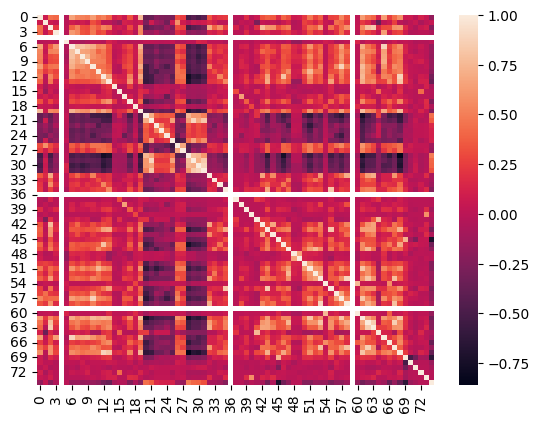

In [78]:
sns.heatmap(scaled_data.corr())

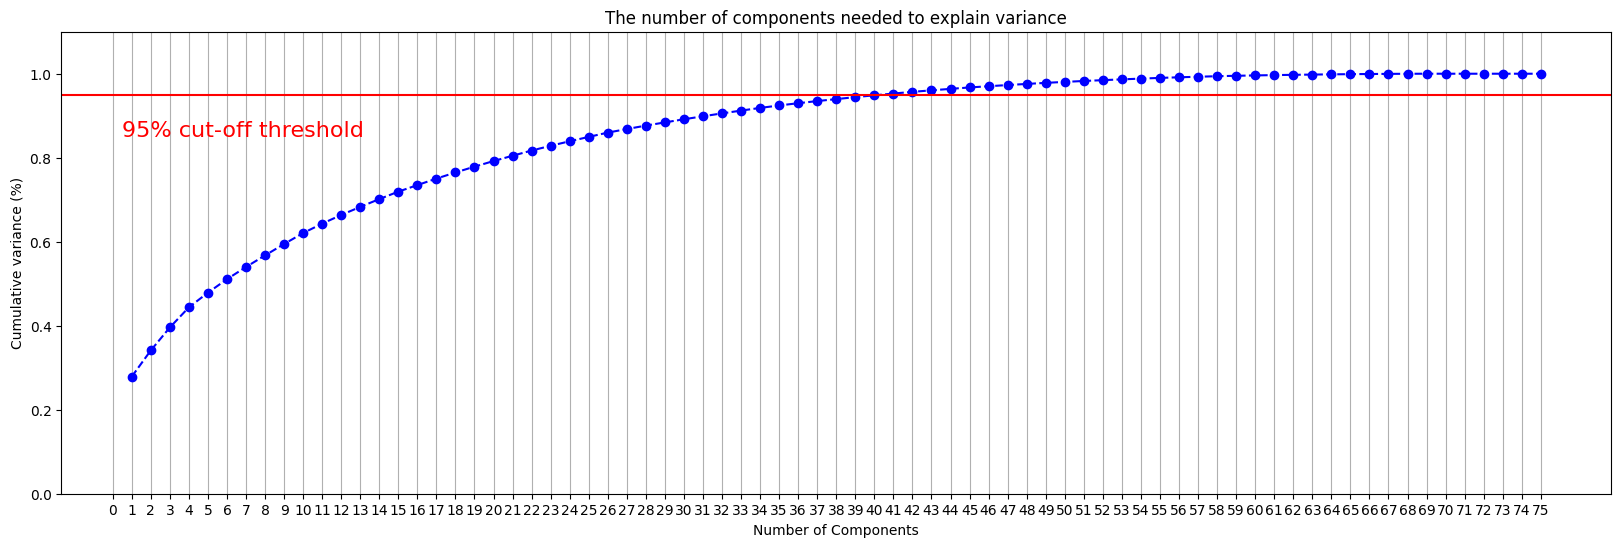

In [90]:
pca = PCA().fit(scaled_data)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 76, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 76, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [91]:
# In this case, to get 95% of variance explained I need 41 principal components.

#Applying PCA
#Taking no. of Principal Components as 41
pca = PCA(n_components = 41)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=[f"PC{i}" for i in range(1,42)])
data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.259351  0.226007  0.000576  0.638271 -0.706355 -2.031064  0.196558   
1  5.012654 -1.008432 -3.290845 -0.716922 -0.353318  0.155469  0.208731   
2 -2.496409  0.159994 -0.354962  0.642968  0.073050 -2.209988  1.074853   
3 -3.376564  0.193764 -0.046629  0.581531 -0.587286 -1.938987  0.347401   
4  3.043644 -2.289470 -0.456415 -0.658546 -0.736465  0.120926  1.049882   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.010377  0.145364  0.794979  0.557441 -0.126829  0.421051 -0.174253   
1 -1.510993  0.891363  0.474596  1.172785 -0.807443  1.304772 -0.781262   
2  0.011887  0.343393  0.700224  0.168199 -0.008374  0.552645  0.229269   
3  0.169498  0.136420  0.764355  0.601667 -0.133043  0.317797 -0.232318   
4 -2.337526  0.501392  0.740133  3.810408 -0.217968 -0.565556  0.943724   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  0.769886 -0.364082  0.001651 -0.214005 -0.147330  0.192298  0.113811   
1  0.713732  0.695380  0.286573 -0.191405 -0.246224  0.397128 -0.108180   
2  1.105706 -1.128917  0.011005 -0.885583 -0.555644  0.509568 -0.137315   
3  0.798510 -0.306913 -0.007635 -0.238533 -0.181207  0.231982  0.095257   
4 -0.854197 -0.768157 -1.297246 -2.017753 -0.836646 -1.238829 -1.032680   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.213223 -0.089313  0.249935 -0.073647 -0.111123 -0.101183 -0.003180   
1  1.377561  0.598295  0.507232 -0.689527 -1.135099 -0.414155 -0.712917   
2  0.951341  0.085773 -0.390171 -0.425639 -0.716079 -0.669484 -0.754584   
3 -0.252943 -0.153389  0.326120 -0.138670 -0.043095 -0.237124 -0.108219   
4  1.326490 -0.921696  0.746769  0.983631  0.112230 -0.095757  0.231327   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  0.280220  0.019426  0.298457 -0.057804 -0.042071 -0.152165  0.067910   
1  0.791402 -0.306857 -0.727999 -0.113928 -0.193543 -0.564445 -0.148196   
2 -0.655878 -0.047432 -0.601637  0.288866  0.184439 -0.106485  0.280710   
3  0.327344  0.095628  0.285807  0.019305  0.097619 -0.007521  0.030388   
4 -0.328084 -0.361493  0.982689  0.960046 -0.559740 -0.241036  0.057255   

       PC36      PC37      PC38      PC39      PC40      PC41  
0  0.039919  0.022566 -0.108275 -0.024167 -0.105005  0.024944  
1  1.758412 -0.546702 -0.426406  1.511689 -0.774165  0.489162  
2 -0.141272 -0.893743 -0.032621 -0.613872  0.219067  0.379741  
3  0.059903  0.016228 -0.150130  0.059712 -0.148928  0.066248  
4  0.024277 -0.069077 -0.802239  0.245879 -0.803928 -0.243423

<AxesSubplot: >

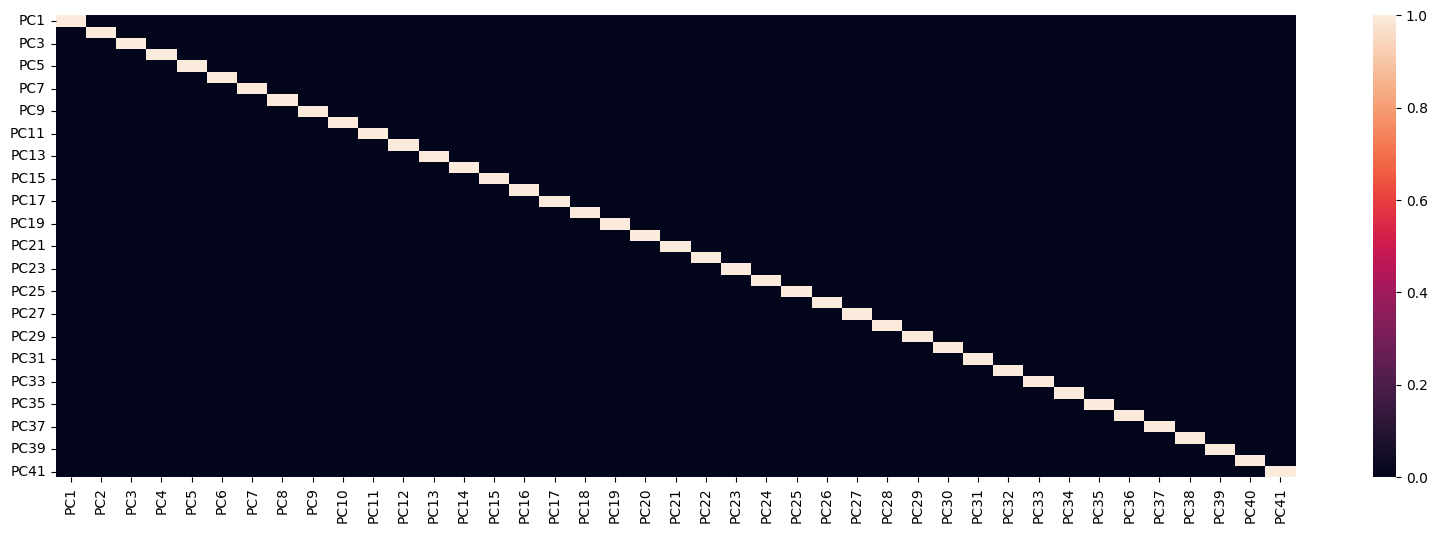

In [92]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())


### Advantages of Principal Component Analysis (PCA):
- For efficient working of ML models, our feature set needs to have features with no co-relation. After implementing the PCA on our dataset, all the Principal Components are independent – there is no correlation among them.
- A Large number of feature sets lead to the issue of overfitting in models. PCA reduces the dimensions of the feature set – thereby reducing the chances of overfitting.
- PCA helps us reduce the dimensions of our feature set; thus, the newly formed dataset comprising Principal Components need less disk/cloud space for storage while retaining maximum information.


# Finally Applying Regression algorithms

### Linear Regression using sklearn

In [102]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

df = pd.concat([data_pca,final.total_points_y],axis=1)
df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.259351  0.226007  0.000576  0.638271 -0.706355 -2.031064  0.196558   
1    5.012654 -1.008432 -3.290845 -0.716922 -0.353318  0.155469  0.208731   
2   -2.496409  0.159994 -0.354962  0.642968  0.073050 -2.209988  1.074853   
3   -3.376564  0.193764 -0.046629  0.581531 -0.587286 -1.938987  0.347401   
4    3.043644 -2.289470 -0.456415 -0.658546 -0.736465  0.120926  1.049882   
..        ...       ...       ...       ...       ...       ...       ...   
662 -0.203575  0.013199 -1.256220 -1.554665  3.034800 -0.034107 -0.363661   
663 -0.910402 -1.238838  1.507516 -1.466682  0.208039  2.208374  0.737335   
664 -3.090015  0.352220 -0.011205  0.204969  0.512422 -1.295892 -0.586886   
665 -4.305518  1.258863  0.903466 -0.058475 -0.431780 -0.457243  1.410408   
666 -3.353558  0.214214  0.582171  0.138061 -0.642182 -2.146953  1.161491   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    0.010377  0.145364  0.794979  0.557441 -0.126829  0.421051 -0.174253   
1   -1.510993  0.891363  0.474596  1.172785 -0.807443  1.304772 -0.781262   
2    0.011887  0.343393  0.700224  0.168199 -0.008374  0.552645  0.229269   
3    0.169498  0.136420  0.764355  0.601667 -0.133043  0.317797 -0.232318   
4   -2.337526  0.501392  0.740133  3.810408 -0.217968 -0.565556  0.943724   
..        ...       ...       ...       ...       ...       ...       ...   
662  1.185082  2.532424  1.163987 -0.503272  0.351231  0.331701  1.477801   
663  0.500269 -1.511830  0.680706 -1.041716 -0.679305 -1.524890 -0.142818   
664 -0.441127 -0.798711  0.051884 -0.614050 -0.639577  0.631974  0.801595   
665  0.227789 -1.397517 -0.220224  0.594969 -1.032168  0.754040  0.050331   
666  1.289440  0.642604  0.674866  0.749854 -0.426699 -0.429932 -0.623818   

         PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0    0.769886 -0.364082  0.001651 -0.214005 -0.147330  0.192298  0.113811   
1    0.713732  0.695380  0.286573 -0.191405 -0.246224  0.397128 -0.108180   
2    1.105706 -1.128917  0.011005 -0.885583 -0.555644  0.509568 -0.137315   
3    0.798510 -0.306913 -0.007635 -0.238533 -0.181207  0.231982  0.095257   
4   -0.854197 -0.768157 -1.297246 -2.017753 -0.836646 -1.238829 -1.032680   
..        ...       ...       ...       ...       ...       ...       ...   
662 -2.648755  1.909684  0.367154 -0.537866  0.044784 -1.129898  0.874597   
663  1.380060 -2.493349 -1.446133 -1.055514 -0.923844 -2.118260 -1.280211   
664 -1.068701  0.484160 -0.307007  0.509240  0.128285 -0.094981 -0.097187   
665 -0.030206 -0.357595  0.223736  0.910184 -0.104760 -0.228115 -0.031717   
666  1.067112 -0.486831 -0.280049  0.269128  0.310565  1.062995 -0.850292   

         PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0   -0.213223 -0.089313  0.249935 -0.073647 -0.111123 -0.101183 -0.003180   
1    1.377561  0.598295  0.507232 -0.689527 -1.135099 -0.414155 -0.712917   
2    0.951341  0.085773 -0.390171 -0.425639 -0.716079 -0.669484 -0.754584   
3   -0.252943 -0.153389  0.326120 -0.138670 -0.043095 -0.237124 -0.108219   
4    1.326490 -0.921696  0.746769  0.983631  0.112230 -0.095757  0.231327   
..        ...       ...       ...       ...       ...       ...       ...   
662 -0.108910 -3.165657 -2.579027 -0.879008 -3.477805  1.560142  0.210440   
663  0.082249 -1.313459  0.474544  0.208003  0.741393  1.335528 -0.278476   
664 -0.338384 -0.351994 -0.660448  0.600196  0.466560  0.816817 -0.840955   
665 -0.466100 -0.339275 -0.450353 -0.290887  0.104626 -0.009843 -0.144475   
666  0.512859 -0.467112  1.273522 -0.377671  0.004515  0.402139  0.200550   

         PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0    0.280220  0.019426  0.298457 -0.057804 -0.042071 -0.152165  0.067910   
1    0.791402 -0.306857 -0.727999 -0.113928 -0.193543 -0.564445 -0.148196   
2   -0.655878 -0.047432 -0.601637  0.288866  0.184439 -0.106485  0.280710   
3 

In [116]:
# creating feature variables
X = df.drop('total_points_y',axis= 1)
y = df['total_points_y']

# creating a regression model
model = LinearRegression()
  
# fitting the model
model.fit(X_train, y_train)
  
# making predictions
predictions = model.predict(X_test)

In [117]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_experiment(model)

R^2 :  0.9363216287329216
MAE : 0.3942838668959328
RMSE: 0.5875378564579196
